<a href="https://colab.research.google.com/github/vinayak2019/organic_chem/blob/main/Day2/Reaction_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# @title Run this cell to install the necessary software. { display-mode: "form" }

#@markdown This should take a minute to run.

! pip install pyscf
! pip install rdkit
! pip install geometric
! pip install py3Dmol


import os
import sys
import pyscf
import py3Dmol
import matplotlib.pyplot as plt

from pyscf.hessian import thermo
from pyscf import gto, scf, dft, tools, lo
from pyscf.geomopt.geometric_solver import optimize

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
from pyscf.data.elements import charge
from IPython.core.display import Image
from copy import deepcopy

#@title Load molecule { run: "auto" }
#@markdown Here we will load the molecule using SMILES representation. The SMILES representation can be generated at https://pubchem.ncbi.nlm.nih.gov//edit3/index.html. Copy the smiles text into this cell.

smiles = "CCC[C+]([H])[H]" #@param {type:"string"}


molecule_name = "molecule"
# drawing_style = "stick" #@param ['stick', 'sphere', 'line','carton']

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
rdmol_hs_2d = deepcopy(rdmol_hs)
im = Draw.MolsToGridImage([rdmol_hs])
AllChem.EmbedMolecule(rdmol_hs)
Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))

charge = Chem.rdmolops.GetFormalCharge(rdmol_hs)
if charge != 0:
  spin = 2
else:
  spin = 0
im



In [ ]:
from IPython.core.display import Image
#@title View 3D molecules molecule { run: "auto" }


Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))
with open("{}.xyz".format(molecule_name)) as f:
  xyz = f.read()
v = py3Dmol.view()
v.addModel(xyz, 'xyz')
v.setStyle({'stick':{}})
v.show()

In [ ]:
%%capture
#@title Run DFT calculations

#@markdown The theory behind DFT is beyond this course. In brief, we are solving Schrodinger equation to get the energy. This process will need information about the hamiltonian operator and the wavefuntion of electron. The functional represents the form of Hamiltonian operator and the basis-set is the equation of wavefunction. If there is an error in this step, build the molecule again and run this cell.


functional = "HF" #@param ["HF", "B3LYP"]
basis_set = "3-21G" #@param ["3-21G","6-31G"]




# Set parameters
mol = gto.M(atom=F'{molecule_name}.xyz',  # Establish PySCF mol object
            charge = charge,
            spin = spin,
            basis = basis_set,
            verbose=0
            )


if functional == "B3LYP":
  mf = mol.KS()
  mf.xc = functional  # Set functional
else:
  mf = mol.HF()

# Run Optimization
# mol_eq = optimize(mf)
# # Save results to file
# mol_eq.tofile(F'{molecule_name}_optimization.xyz')


# Run Optimization
mol_eq = optimize(mf,maxsteps=1000)
# Save results to file
mol_eq.tofile(F'{molecule_name}_opt.xyz')


mol = gto.M(atom=F'{molecule_name}_opt.xyz',  # Establish PySCF mol object
            basis = basis_set,
            charge = charge,
            spin = spin,
            verbose=0
            )

if functional == "B3LYP":
  mf = mol.KS()
  mf.xc = functional  # Set functional
else:
  mf = mol.HF()

mf.kernel()




In [ ]:
from IPython.core.display import Image
#@title View optimized 3D molecule { run: "auto" }


Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))
with open("{}_opt.xyz".format(molecule_name)) as f:
  xyz = f.read()
v = py3Dmol.view()
v.addModel(xyz, 'xyz')
v.setStyle({'stick':{}})
v.show()

In [ ]:
#@title Display energy of optimized molecule
print("Energy is {} hartree".format(round(mf.e_tot,4)))

## Task

1. Determine which of the following carbocation is most stable (more negative energy). Give the energy for each cation. Note, add the hydrogen to the positvely charged center while generating the SMILES.

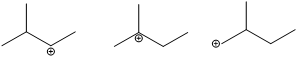

2. Is the following reaction exergonic or endergonic? Hint: Determine the energy of the reactant and product.

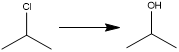